#*** Prediccion Precio de ventas Inmueble ***



#** Nelson Ricardo Caicedo Rivera **
#** Andrés Felipe Escallón Portilla**
#** Grupo C5 Inteligencia Artificial **
#**Nivel Explorador **

#**2024**


#Introduccion

El presente estudio tiene como objetivo principal desarrollar un modelo de predicción capaz de estimar con precisión el precio de venta de viviendas.
La industria inmobiliaria, caracterizada por su dinamismo y complejidad, demanda herramientas que permitan a agentes, compradores y vendedores tomar decisiones más informadas y basadas en datos.

Para lograr este objetivo, se empleó un conjunto de datos que incluía información detallada sobre área, habitaciones, baños, parqueadero.
A través de técnicas de preprocesamiento de datos, se preparó el conjunto de datos para su análisis, incluyendo la codificación de variables categóricas y la normalización de las variables numéricas.
Los resultados obtenidos muestran que el modelo logró el mejor rendimiento, con un valor de R²,este modelo demostró ser capaz de capturar las relaciones existentes entre las características de las viviendas y su precio de venta.
Como trabajo futuro, se propone explorar técnicas de deep learning para capturar patrones más complejos en los datos, así como incorporar información adicional, como imágenes de las propiedades, para mejorar la precisión de las predicciones. Se espera que estos avances contribuyan a una mejor comprensión del mercado inmobiliario y faciliten la toma de decisiones en este sector.

#*** https://www.kaggle.com/datasets/yasserh/housing-prices-dataset***




#** Link Video **
https://drive.google.com/file/d/1DVSOaLu3p0pE7RFuJf07F6Bvtrqvb538/view?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel

In [ ]:
dataHousing = pd.read_csv('/content/drive/MyDrive/Courses/Talen_Tech/Datasets/Housing.csv')
dataHousing.head(9)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished


In [ ]:
dataHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
dataHousing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
dataHousing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

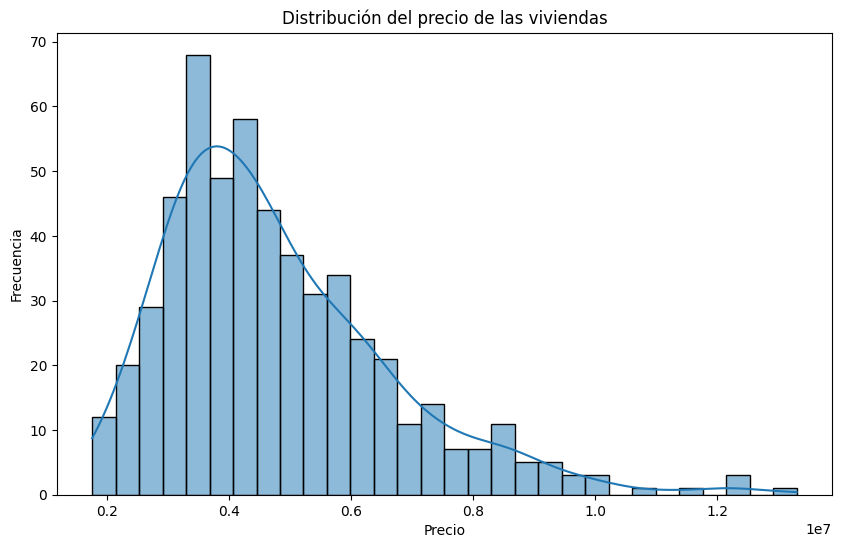

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataHousing['price'], bins=30, kde=True)
plt.title('Distribución del precio de las viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

#*** Encoding Columns ***

In [ ]:
enconding = OneHotEncoder()
X_enconding = enconding.fit_transform(dataHousing[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']]).toarray()
X_enconding = pd.DataFrame(X_enconding, columns=enconding.get_feature_names_out())
X_enconding.head()

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


#*** Drop Colums of Original dataframe***

In [ ]:
dataHousing.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus'], axis=1, inplace=True)
dataHousing.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


#-***Standaring Data ****

In [ ]:
data_copy = dataHousing.copy()

In [ ]:
standar_data = StandardScaler()
data_standar = standar_data.fit_transform(data_copy)
data_standar = pd.DataFrame(data_standar, columns=data_copy.columns)
data_standar.head()

,price,area,bedrooms,bathrooms,stories,parking
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692


In [ ]:
X_features = data_standar.drop('price', axis=1)
y_target = data_standar['price']

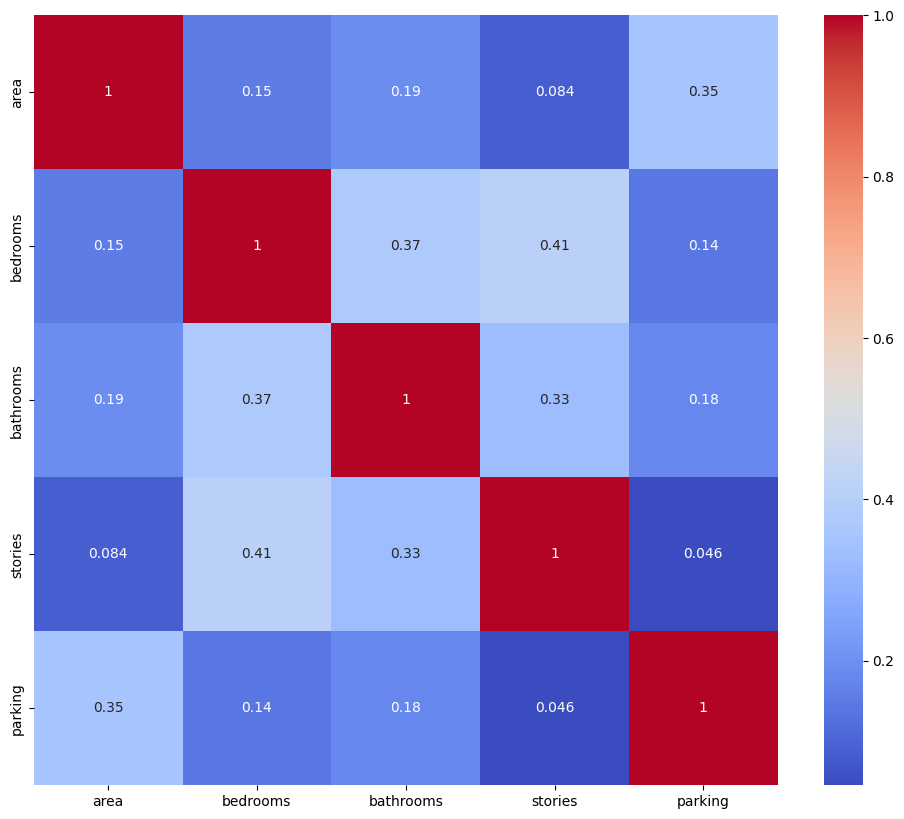

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_features.corr(), annot=True, cmap='coolwarm')
plt.show()

#*** Split Data ***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)


In [ ]:
print(f'The total numeber of sameples is {len(X_features)}')
print(f'The total numeber of train samples is {len(X_train)}')
print(f'The shape of train samples is {X_train.shape}')
print(f'The total numeber of test samples is {len(X_test)}')
print(f'The shape of test samples is {X_test.shape}')

The total numeber of sameples is 545
The total numeber of train samples is 436
The shape of train samples is (436, 5)
The total numeber of test samples is 109
The shape of test samples is (109, 5)


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = linear_model.predict(X_test)

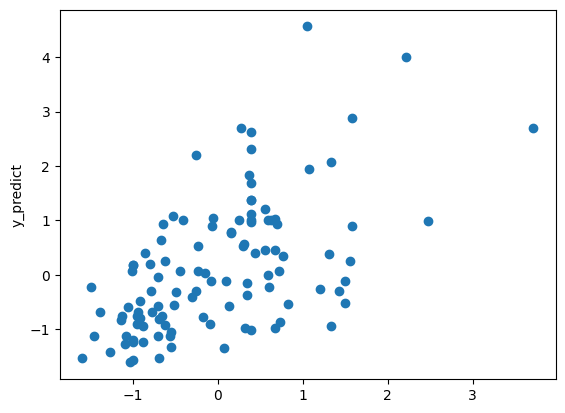

In [ ]:
plt.scatter(X_test.iloc[:, 0], y_test)
#plt.plot(X_test, linear_model.predict(X_test), color='red')
plt.ylabel('y_predict')
plt.show()

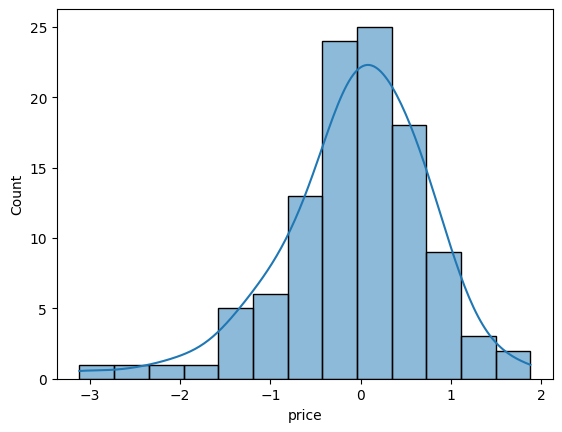

In [ ]:
diferencia = y_predict - y_test
sns.histplot(diferencia, kde=True )
plt.show()

In [ ]:
print(f'El error cuadratico medio es: {mean_squared_error(y_test, y_predict)}')
print(f'La raiz del error cuadratico medio es: {np.sqrt(mean_squared_error(y_test, y_predict))}')
print(f'El error absoluto medio es: {mean_absolute_error(y_test, y_predict)}')
print(f'El coeficiente de determinacion es r²: {r2_score(y_test, y_predict)}')

El error cuadratico medio es: 0.6565405133620384
La raiz del error cuadratico medio es: 0.8102718762008456
El error absoluto medio es: 0.6033443458552086
El coeficiente de determinacion es r²: 0.5464062355495867


#*** Concat original data with X_encoding ***

In [ ]:
dataHousing_encodign = pd.concat([dataHousing, X_enconding], axis=1)
dataHousing_encodign.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
dataHousing_encodign.drop(['basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes','prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'], axis=1, inplace=True)
dataHousing_encodign.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0


#*** Null Data ***

In [ ]:
dataHousing_encodign.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
parking,0
mainroad_no,0
mainroad_yes,0
guestroom_no,0
guestroom_yes,0


In [ ]:
X_features = dataHousing_encodign.drop('price', axis=1)
y_target = dataHousing_encodign['price']

#*** Standaring Data ****

In [ ]:
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)
X_features_scaled.shape

(545, 9)

#*** Convert Numpy to Pandas ***

In [ ]:
X_features_scaled = pd.DataFrame(X_features_scaled, columns=X_features.columns)
X_features_scaled.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes
0,1.046726,1.403419,1.421812,1.378217,1.517692,-0.405623,0.405623,0.465315,-0.465315
1,1.757010,1.403419,5.405809,2.532024,2.679409,-0.405623,0.405623,0.465315,-0.465315
2,2.218232,0.047278,1.421812,0.224410,1.517692,-0.405623,0.405623,0.465315,-0.465315
3,1.083624,1.403419,1.421812,0.224410,2.679409,-0.405623,0.405623,0.465315,-0.465315
4,1.046726,1.403419,-0.570187,0.224410,1.517692,-0.405623,0.405623,-2.149083,2.149083


#*** Correlation Matrix ***

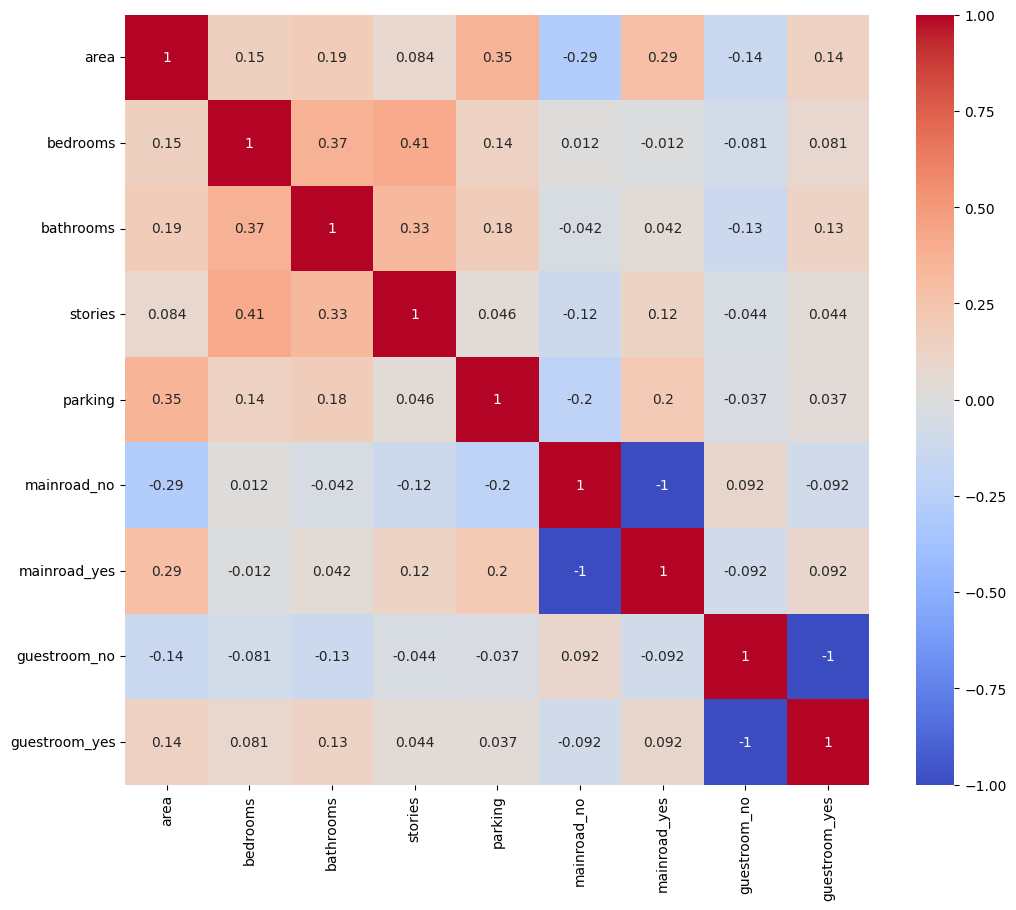

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_features_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

#*** Split Data ***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target, test_size=0.2, random_state=42)
print(f'The total numeber of sameples is {len(X_features)}')
print(f'The total numeber of train samples is {len(X_train)}')
print(f'The shape of train samples is {X_train.shape}')
print(f'The total numeber of test samples is {len(X_test)}')
print(f'The shape of test samples is {X_test.shape}')
print(y_train.shape)
print(y_test.shape)

The total numeber of sameples is 545
The total numeber of train samples is 436
The shape of train samples is (436, 9)
The total numeber of test samples is 109
The shape of test samples is (109, 9)
(436,)
(109,)


#*** Train Model ***

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = linear_model.predict(X_test)

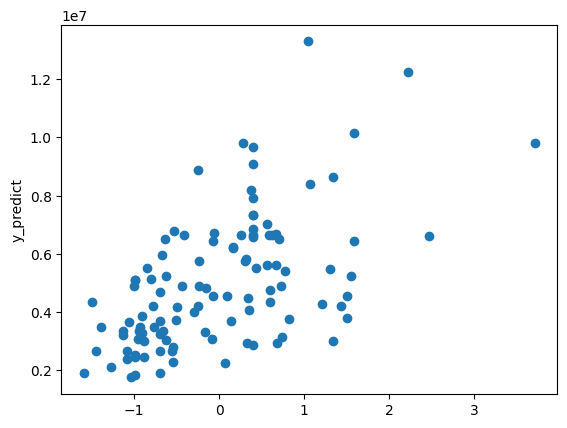

In [ ]:
plt.scatter(X_test.iloc[:, 0], y_test)

plt.ylabel('y_predict')
plt.show()

#*** Diferencia ***

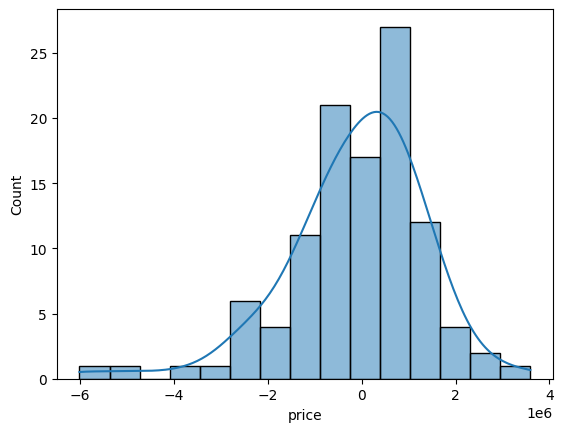

In [ ]:
diferencia = y_predict - y_test
sns.histplot(diferencia, kde=True )
plt.show()

#*** Metrics ***

In [ ]:
print(f'El error cuadratico medio es: {mean_squared_error(y_test, y_predict)}')
print(f'La raiz del error cuadratico medio es: {np.sqrt(mean_squared_error(y_test, y_predict))}')
print(f'El error absoluto medio es: {mean_absolute_error(y_test, y_predict)}')
print(f'El coeficiente de determinacion es r²: {r2_score(y_test, y_predict)}')

El error cuadratico medio es: 2177505151588.0183
La raiz del error cuadratico medio es: 1475637.2018853477
El error absoluto medio es: 1094965.8003741298
El coeficiente de determinacion es r²: 0.5692007340967825


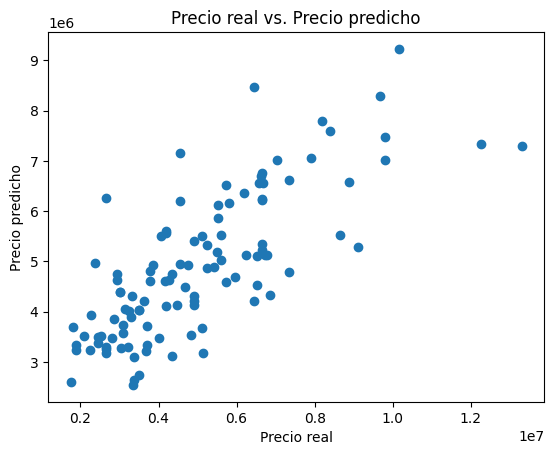

In [ ]:
plt.scatter(y_test, y_predict)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Precio real vs. Precio predicho')
plt.show()